# Feature Selection

In [7]:
# Import the libraries needed
import os


import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.metrics import f1_score

In [8]:
# Read the two datasets from the pickle files
dir_path = os.getcwd()

X_train = pd.read_pickle(dir_path + "\\data\\X_train_log_aug.pkl")
X_test = pd.read_pickle(dir_path + "\\data\\X_test_log.pkl")


y_train = pd.read_pickle(dir_path + "\\data\\y_train_log_aug.pkl")
y_test = pd.read_pickle(dir_path + "\\data\\y_test.pkl")

In [9]:
# Start testing models, starting with a simple logistic regression
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

print("Accuracy with normalized transformed data: ", log_reg.score(X_test, y_test))

y_pred = log_reg.predict(X_test)
print("sklearn f1_score on normalized data: ", f1_score(y_test, y_pred))


Accuracy with normalized transformed data:  0.7574666666666666
sklearn f1_score on normalized data:  0.4747328905573202


C:\Users\natha\anaconda3\envs\dc2\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From the F1-score it is clear the dataset is very unbalanced. 
We'll use SMOTE to add samples from the least numerous classes and try again with a naive logistic regression.

In [10]:
# X_tr_norm_aug, X_val_norm_aug, y_tr_norm_aug,  y_val_norm_aug = train_test_split(X_train_norm, y_train, test_size=0.2)


In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report

def from_probs_to_class(probs, threshold=0.5):
    preds = []
    for prob in probs:
        if prob[0] > threshold:
            preds.append(1)
        else:
            preds.append(0)
    return preds



def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test, batch_size=64, verbose=1)
    y_pred_bool = from_probs_to_class(y_pred, threshold=0.5)
    print(classification_report(y_test, y_pred_bool))
    print("fscore on test set: ", f1_score(y_test, y_pred_bool, zero_division=True))
    print("confusion matrix:")
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bool)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

118/118 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5873
           1       0.53      0.46      0.49      1627

    accuracy                           0.79      7500
   macro avg       0.69      0.67      0.68      7500
weighted avg       0.79      0.79      0.79      7500

fscore on test set:  0.49411764705882355
confusion matrix:


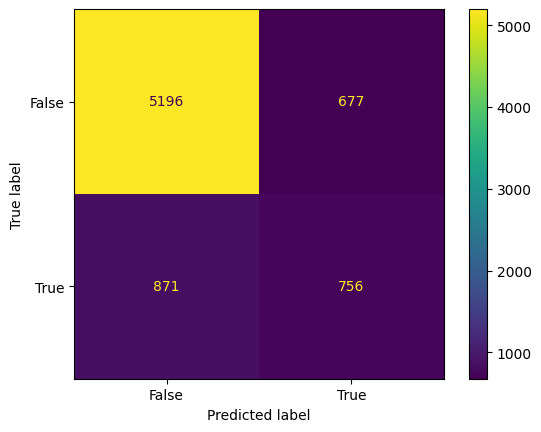

In [23]:
import tensorflow as tf
from tensorflow import keras
from tqdm.keras import TqdmCallback

model1 = keras.models.Sequential([

    keras.layers.InputLayer(input_shape=(32, )),

    keras.layers.Dense(1,activation="sigmoid"),
])

optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
model1.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


history = model1.fit(X_train, y_train, epochs=10,
                    validation_split=0.2, verbose=False)
evaluate_model(model1, X_test, y_test)

118/118 [==============================] - 0s 552us/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5873
           1       0.57      0.43      0.49      1627

    accuracy                           0.81      7500
   macro avg       0.71      0.67      0.69      7500
weighted avg       0.79      0.81      0.80      7500

fscore:  0.48945147679324896
confusion matrix:


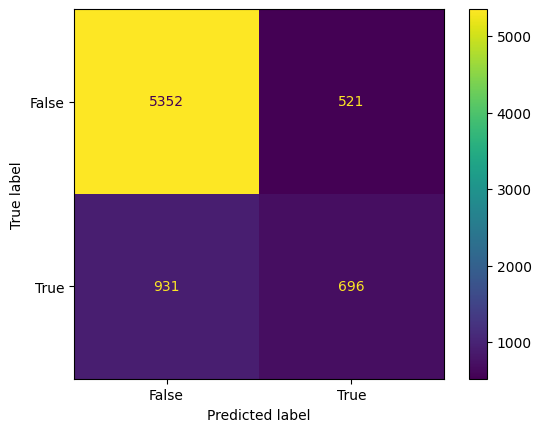

In [66]:
import tensorflow as tf
from tensorflow import keras
from tqdm.keras import TqdmCallback

model2 = keras.models.Sequential([

    keras.layers.InputLayer(input_shape=(32, )),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
model2.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


history = model2.fit(X_train, y_train, epochs=150,
                    validation_split=0.2, verbose=False)
evaluate_model(model2, X_test, y_test)

118/118 [==============================] - 0s 523us/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5873
           1       0.56      0.45      0.50      1627

    accuracy                           0.80      7500
   macro avg       0.71      0.68      0.69      7500
weighted avg       0.79      0.80      0.80      7500

fscore:  0.4979564032697547
confusion matrix:


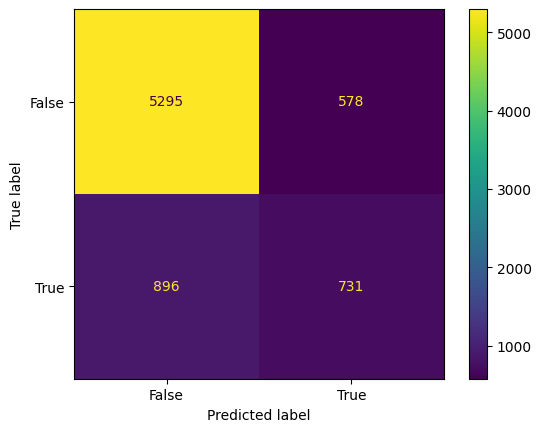

In [71]:
import tensorflow as tf
from tensorflow import keras
from tqdm.keras import TqdmCallback

model2 = keras.models.Sequential([

    keras.layers.InputLayer(input_shape=(32, )),
    keras.layers.Dense(5,activation="relu"),


    keras.layers.Dense(1,activation="sigmoid"),
])

optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
model2.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


history = model2.fit(X_train, y_train, epochs=200,
                    validation_split=0.2, verbose=False)
evaluate_model(model2, X_test, y_test)

In [ ]:


model2 = keras.models.Sequential([

    keras.layers.InputLayer(input_shape=(32, )),
    keras.layers.Dense(5,activation="relu"),


    keras.layers.Dense(1,activation="sigmoid"),
])

optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
model2.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


history = model2.fit(X_train, y_train, epochs=200,
                    validation_split=0.2, verbose=False)
evaluate_model(model2, X_test, y_test)

In [40]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = X_train.to_numpy().reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (34982, 32, 1)
1 Sample shape:
 (32, 1)
An example sample:
 [[ 3.22912511e-01]
 [ 1.00000000e+00]
 [ 2.90000000e+01]
 [-1.00000000e+00]
 [-1.00000000e+00]
 [-1.00000000e+00]
 [ 0.00000000e+00]
 [-1.00000000e+00]
 [-1.00000000e+00]
 [ 6.02800297e-03]
 [ 1.49012691e-03]
 [ 3.19775594e-03]
 [ 1.70700376e-03]
 [ 1.32041699e-03]
 [ 3.27767777e-03]
 [ 1.49385762e-03]
 [ 3.20427163e-03]
 [ 9.37653010e-04]
 [ 1.32228513e-03]
 [ 3.45026554e-03]
 [ 5.28999729e-03]
 [ 0.00000000e+00]
 [ 1.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.00000000e+00]
 [ 0.00000000e+00]]


In [42]:
test_data_reshaped = X_test.to_numpy().reshape(X_test.shape[0],X_test.shape[1],1)


In [ ]:
n_timesteps = train_data_reshaped.shape[1] #13
n_features  = train_data_reshaped.shape[2] #1 
model = keras.Sequential(name="model_conv1D")
model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
  
model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  
model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
model.add(keras.layers.Dense(n_features, name="Dense_2"))

Epoch 1/300
875/875 [==============================] - 4s 4ms/step - loss: 0.5901 - accuracy: 0.6854 - val_loss: 0.5589 - val_accuracy: 0.7054
Epoch 2/300
875/875 [==============================] - 4s 4ms/step - loss: 0.5463 - accuracy: 0.7233 - val_loss: 0.5422 - val_accuracy: 0.7235
Epoch 3/300
875/875 [==============================] - 3s 4ms/step - loss: 0.5368 - accuracy: 0.7291 - val_loss: 0.5340 - val_accuracy: 0.7210
Epoch 4/300
875/875 [==============================] - 4s 5ms/step - loss: 0.5332 - accuracy: 0.7300 - val_loss: 0.5317 - val_accuracy: 0.7220
Epoch 5/300
875/875 [==============================] - 4s 4ms/step - loss: 0.5314 - accuracy: 0.7308 - val_loss: 0.5325 - val_accuracy: 0.7219
Epoch 6/300
875/875 [==============================] - 3s 4ms/step - loss: 0.5318 - accuracy: 0.7303 - val_loss: 0.5274 - val_accuracy: 0.7217
Epoch 7/300
875/875 [==============================] - 3s 4ms/step - loss: 0.5289 - accuracy: 0.7320 - val_loss: 0.5306 - val_accuracy: 0.7250

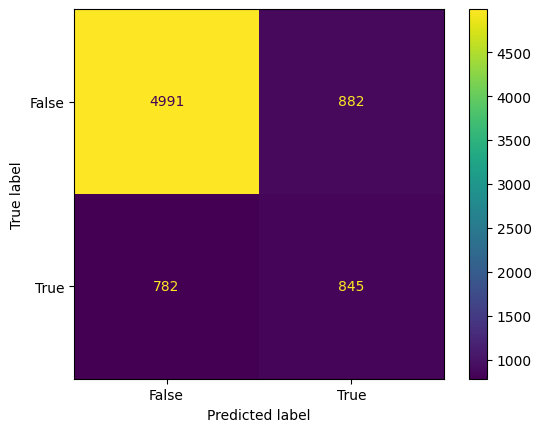

In [69]:


n_timesteps = train_data_reshaped.shape[1] #13
n_features  = train_data_reshaped.shape[2]

model2 = keras.models.Sequential([
    keras.layers.Input(shape=(n_timesteps,n_features)),
    keras.layers.Conv1D(64, 5, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"),
    keras.layers.Flatten(),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),

    keras.layers.Dense(1,activation="sigmoid"),
])

optimizer=tf.keras.optimizers.Adam(learning_rate=0.005)
model2.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


history = model2.fit(train_data_reshaped, y_train, epochs=300,
                    validation_split=0.2, verbose=True)

evaluate_model(model2, test_data_reshaped, y_test)

In [55]:
train_data_reshaped

array([[[ 0.32291251],
        [ 1.        ],
        [29.        ],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[ 0.095312  ],
        [ 1.        ],
        [25.        ],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[ 0.095312  ],
        [ 0.        ],
        [47.        ],
        ...,
        [ 1.        ],
        [ 0.        ],
        [ 0.        ]],

       ...,

       [[ 0.095312  ],
        [ 0.        ],
        [35.        ],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[ 0.16143578],
        [ 1.        ],
        [32.        ],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[ 0.60555313],
        [ 0.        ],
        [30.        ],
        ...,
        [ 1.        ],
        [ 0.        ],
        [ 0.        ]]])